# Decision Tree Assignment

**Dataset:** heart_disease.xlsx

**Goal:** Build and evaluate a Decision Tree classifier to predict heart disease.
This notebook is written in a fresher-friendly way with step-by-step explanations.

## Step 1 — Import Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


## Step 2 — Load Dataset

In [27]:
# Load dataset (ensure 'heart_disease.xlsx' is in same folder)
df = pd.read_excel('heart_disease.xlsx',sheet_name=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


## Step 3 — Exploratory Data Analysis (EDA)

In [28]:
print('Shape:', df.shape)
print('\nInfo:')
print(df.info())

print('\nMissing values per column:')
print(df.isnull().sum())

df.describe(include='all').T

Shape: (908, 13)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None

Missing values per column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
n

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,908.0,NaN,NaN,NaN,53.79185,9.158031,29.0,47.75,54.0,60.0,77.0
sex,908,2,Male,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,908,4,asymptomatic,495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,908.0,NaN,NaN,NaN,133.430617,20.401608,0.0,120.0,130.0,144.0,200.0
chol,908.0,NaN,NaN,NaN,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
fbs,908,2,False,723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,908,3,normal,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalch,908.0,NaN,NaN,NaN,135.957048,26.804929,60.0,118.0,138.0,156.0,202.0
exang,908,4,False,516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,846.0,NaN,NaN,NaN,0.891253,1.093875,-2.6,0.0,0.5,1.5,6.2


## Step 4 — Data Preprocessing

In [29]:
# Fill missing values if any
for col in df.select_dtypes(include=['int64','float64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Correct misspelled values in 'exang' and convert to boolean
df['exang'] = df['exang'].astype(str).replace({'TURE': 'True', 'FALSE': 'False'}).astype(bool)

# Convert boolean columns to integers
boolean_cols = df.select_dtypes(include=['bool']).columns
for col in boolean_cols:
    df[col] = df[col].astype(int)

# Define categorical columns to encode (excluding 'num', 'fbs', and 'exang' which are now int)
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']

# Encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

/tmp/ipython-input-747648895.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-747648895.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


## Step 5 — Define Features & Target

In [30]:
# Assume the last column is the target (Heart Disease status)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print('Features shape:', X.shape)
print('Target shape:', y.shape)

Features shape: (908, 12)
Target shape: (908,)


## Step 6 — Train-Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train size:', X_train.shape)
print('Test size:', X_test.shape)

Train size: (726, 12)
Test size: (182, 12)


## Step 7 — Build Decision Tree Classifier

In [32]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.5054945054945055
Precision: 0.5063446290327431
Recall: 0.5054945054945055
F1 Score: 0.5045760479258016


## Step 8 — Confusion Matrix & Classification Report

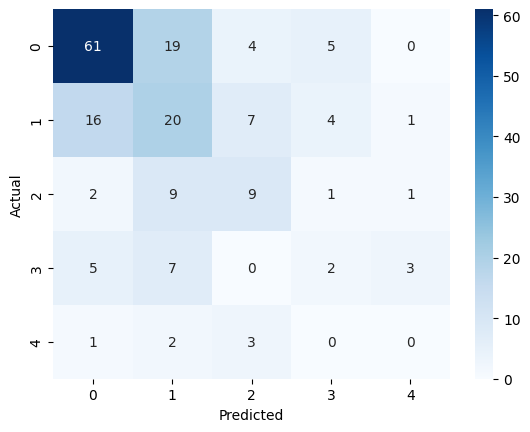

              precision    recall  f1-score   support

           0       0.72      0.69      0.70        89
           1       0.35      0.42      0.38        48
           2       0.39      0.41      0.40        22
           3       0.17      0.12      0.14        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.33      0.33      0.32       182
weighted avg       0.51      0.51      0.50       182



In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))

## Step 9 — Hyperparameter Tuning

In [36]:
for depth in [2,4,6,8,None]:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print(f'Max Depth={depth} -> Accuracy: {accuracy_score(y_test, y_pred):.3f}')

Max Depth=2 -> Accuracy: 0.538
Max Depth=4 -> Accuracy: 0.582
Max Depth=6 -> Accuracy: 0.555
Max Depth=8 -> Accuracy: 0.555
Max Depth=None -> Accuracy: 0.505


## Step 10 — Visualize Decision Tree & Feature Importance

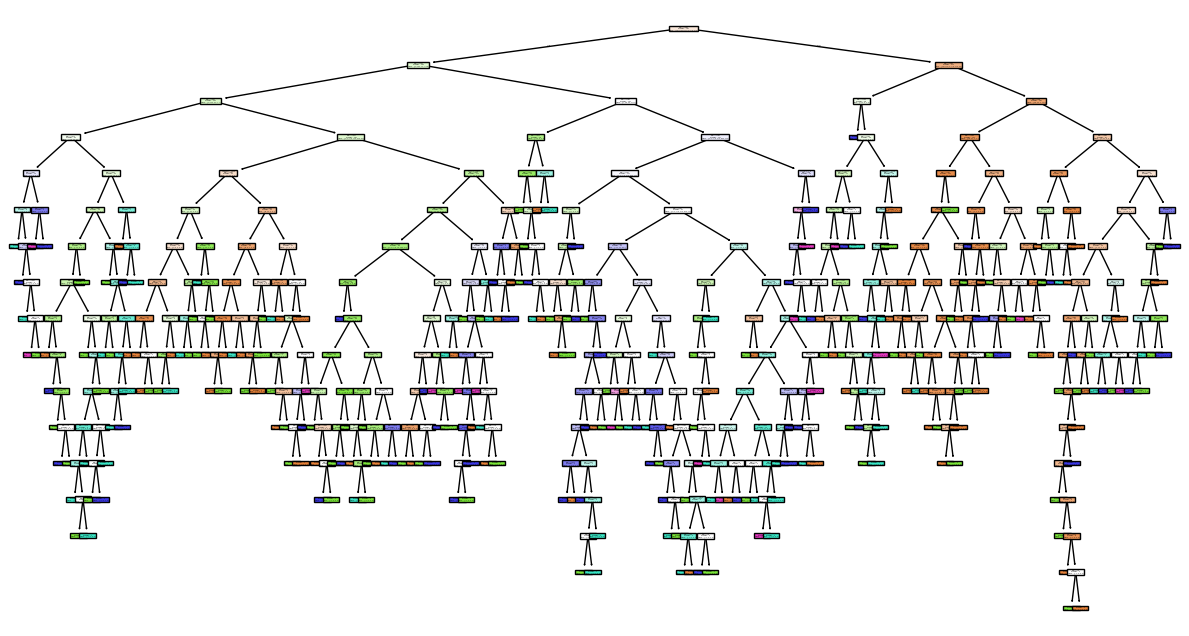

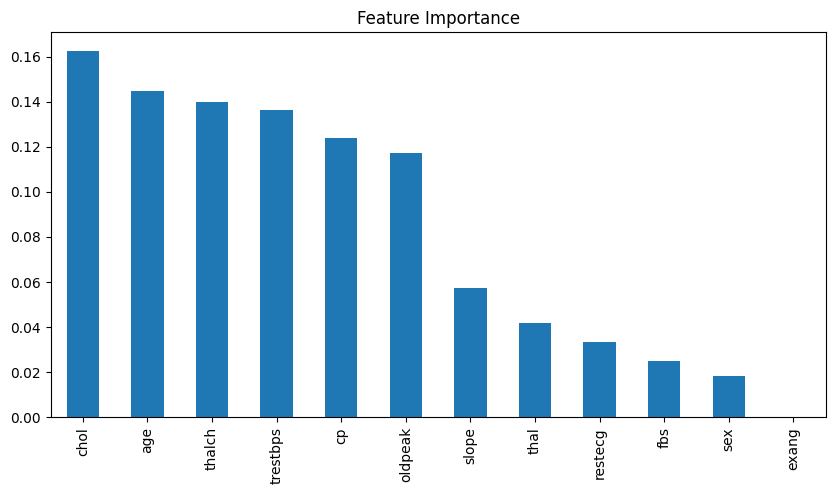

In [38]:
plt.figure(figsize=(15,8))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

# Feature importance
feat_imp = pd.Series(dt.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Feature Importance')
plt.show()

## Step 11 — Interview Q&A

**Q1. What are the main hyperparameters of a Decision Tree?**
- `criterion` (gini/entropy)
- `max_depth`
- `min_samples_split`
- `min_samples_leaf`

**Q2. Difference between Label Encoding and One-Hot Encoding?**
- Label Encoding converts categories to integers.
- One-Hot Encoding creates binary columns for each category.

**Q3. Advantages of Decision Trees?**
- Easy to understand and interpret.
- Handles numerical & categorical data.
- No need for scaling.

**Q4. Disadvantages of Decision Trees?**
- Prone to overfitting.
- Sensitive to small changes in data.
- Can be biased toward dominant classes.